<a href="https://colab.research.google.com/github/TeoGal/python-finance-readgroup/blob/main/chapter_5/chapter_5_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHAPTER 5

Please run those two cells before running the Notebook!

As those plotting settings are standard throughout the book, we do not show them in the book every time we plot something.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

Install Talib in Google Colab from
https://stackoverflow.com/questions/49648391/how-to-install-ta-lib-in-google-colab

In [2]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4572    0  4572    0     0  12170      0 --:--:-- --:--:-- --:--:-- 12192
100  517k  100  517k    0     0   497k      0  0:00:01  0:00:01 --:--:-- 1126k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4520    0  4520    0     0  13046      0 --:--:-- --:--:-- --:--:-- 13025
100  392k  100  392k    0     0   394k      0 --:--:-- --:--:-- --:--:--  394k


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

'''
Can't resolve the following commented code in Google colab for some reason
'''

#from pandas.core.common import SettingWithCopyWarning
#warnings.simplefilter(action="ignore", category=FutureWarning)
#warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid",
              palette="colorblind", color_codes=True,
              rc={"figure.figsize": [12, 8]})

# Chapter 5 - Technical Analysis and Building Interactive Dashboards

## 5.1 Calculating the most popular technical indicators

### How to do it...

1. Import the libraries:

In [4]:
import pandas as pd
import yfinance as yf
import talib

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


2. Download IBM's stock prices from 2020:

In [5]:
df = yf.download("IBM",
                 start="2020-01-01",
                 end="2020-12-31",
                 progress=False,
                 auto_adjust=True)
df

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,105.977059,106.699278,105.796511,106.306770,3293436
2020-01-03,104.854471,105.867146,104.846621,105.458939,2482890
2020-01-06,104.736747,105.380456,104.564041,105.270561,2537073
2020-01-07,104.948692,105.945662,104.721040,105.341194,3232977
2020-01-08,105.592403,106.652176,105.129241,106.220413,4545916
...,...,...,...,...,...
2020-12-23,102.347735,103.446564,102.232070,102.364258,2817819
2020-12-24,103.273058,103.355678,102.620374,103.016937,1842111
2020-12-28,103.355682,104.594954,102.826924,103.124352,3781499


3. Calculate and plot the Simple Moving Average:

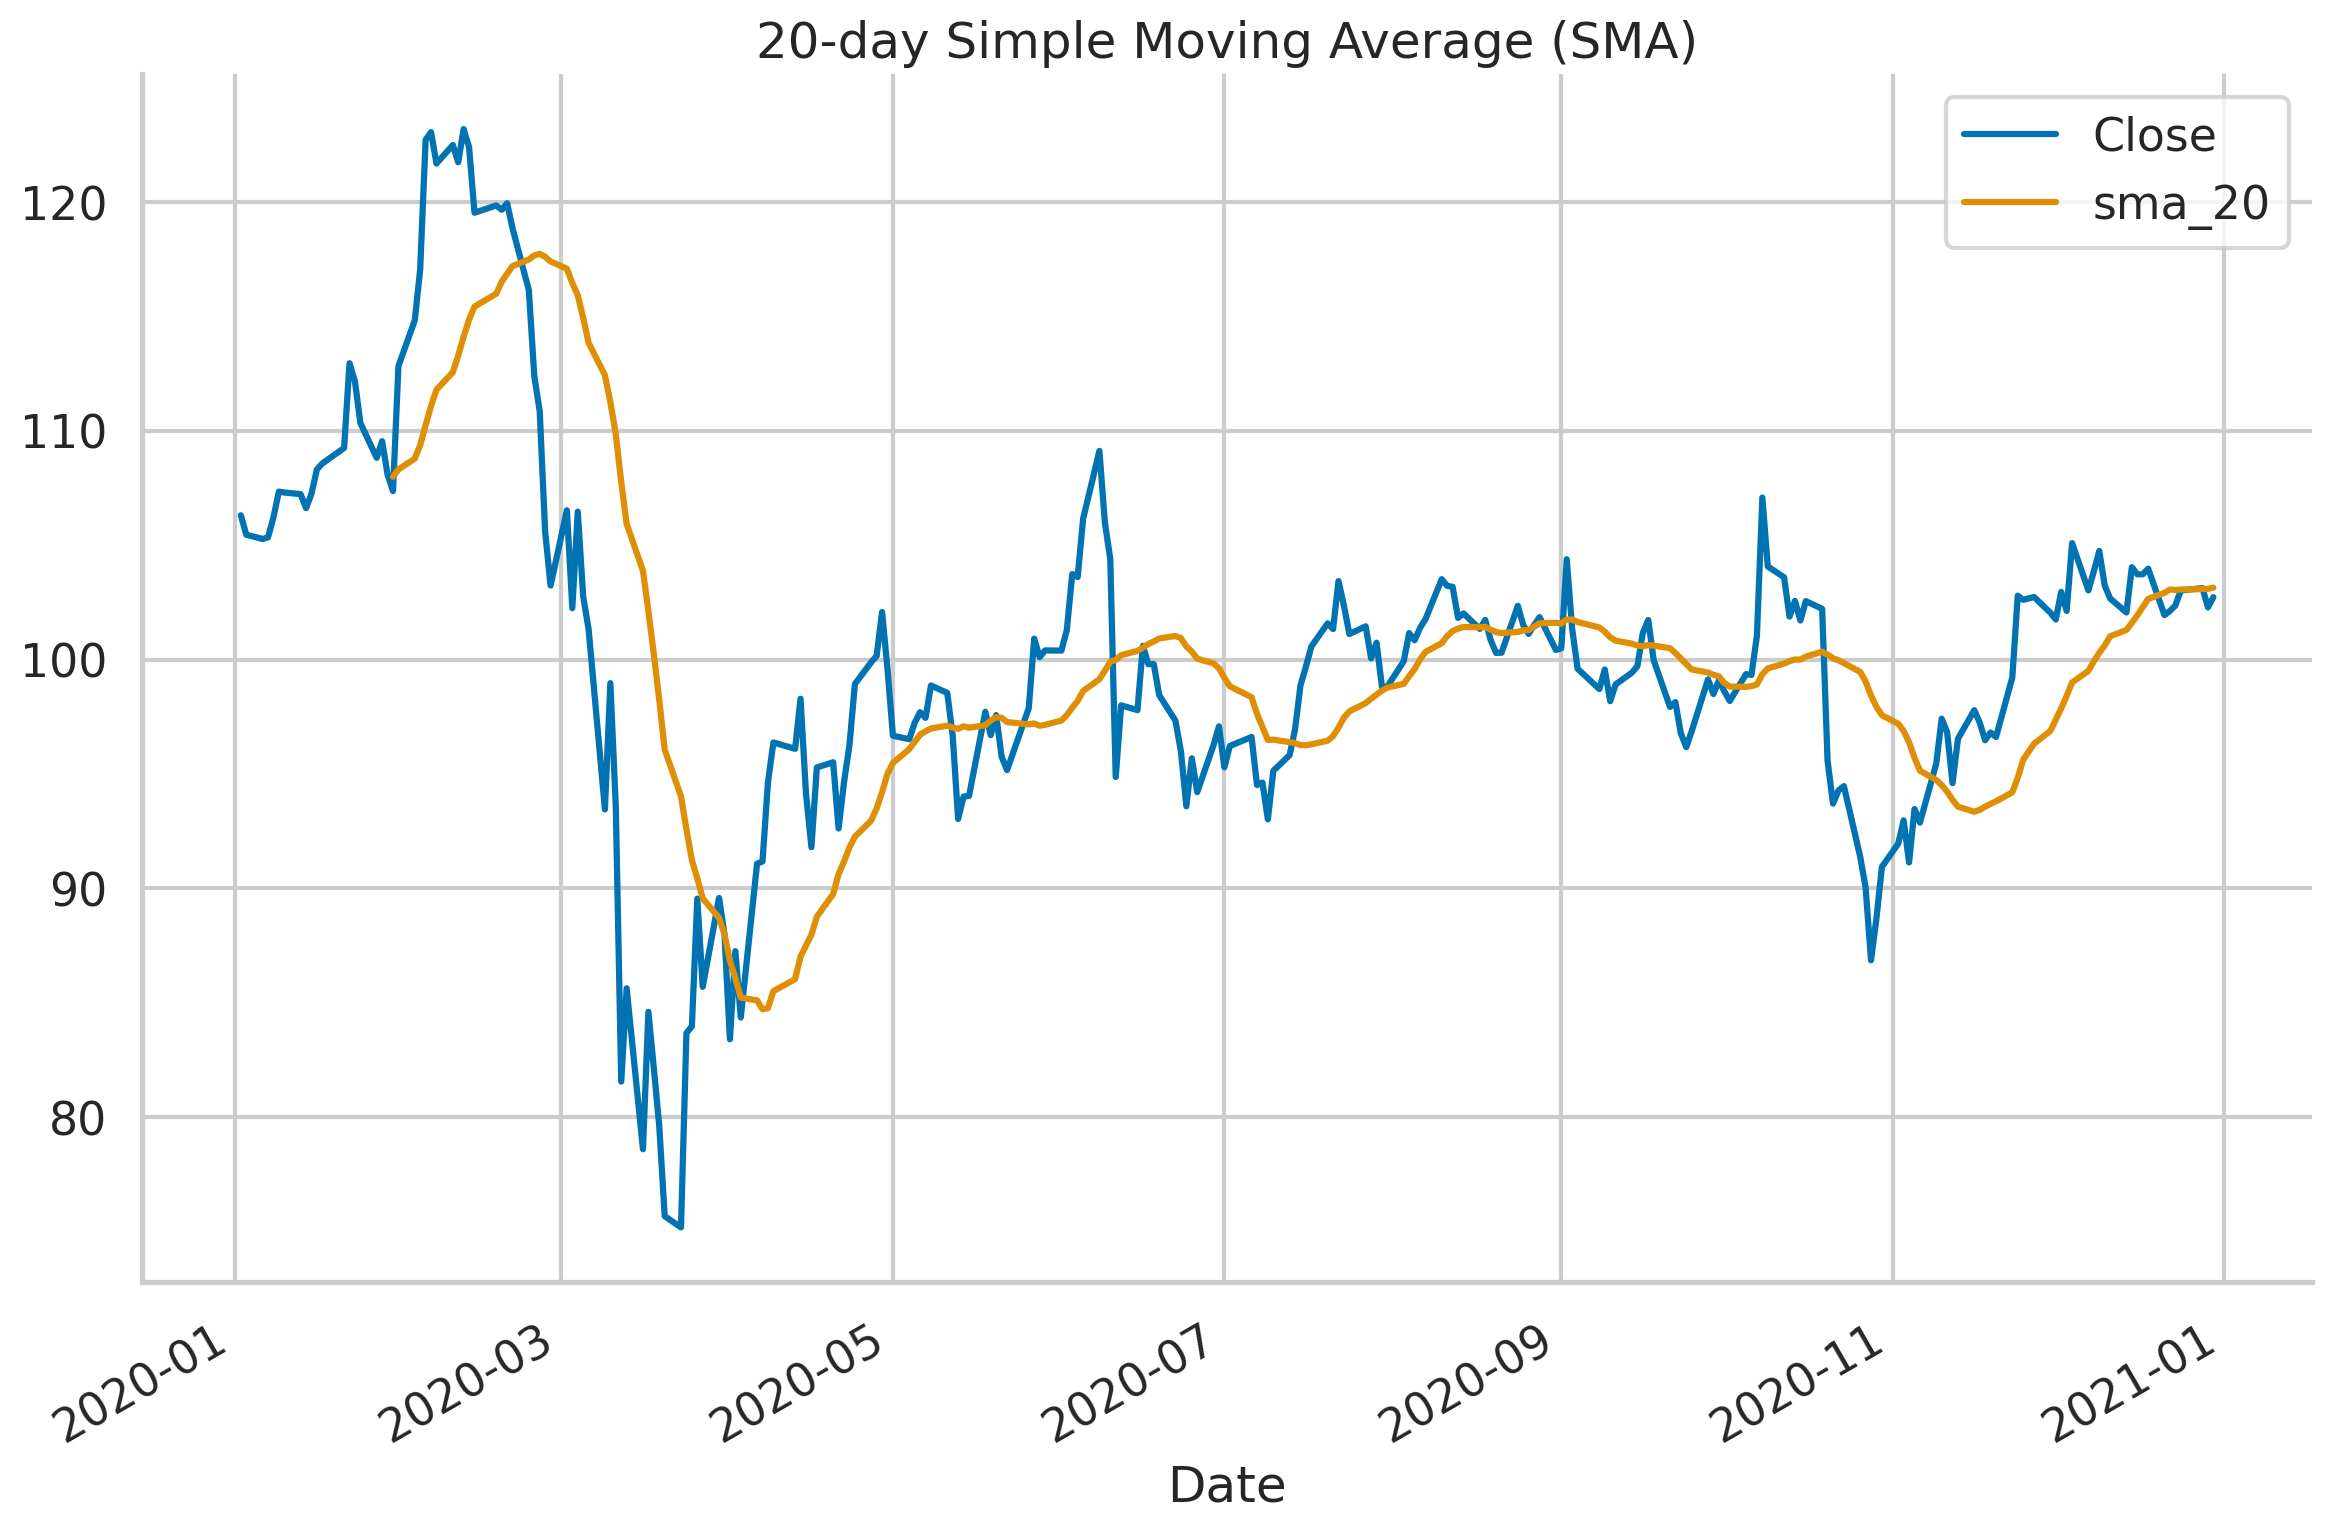

In [6]:
df["sma_20"] = talib.SMA(df["Close"], timeperiod=20)
(
    df[["Close", "sma_20"]]
    .plot(title="20-day Simple Moving Average (SMA)")
)

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_5_1", dpi=200)

4. Calculate and plot the Bollinger bands:

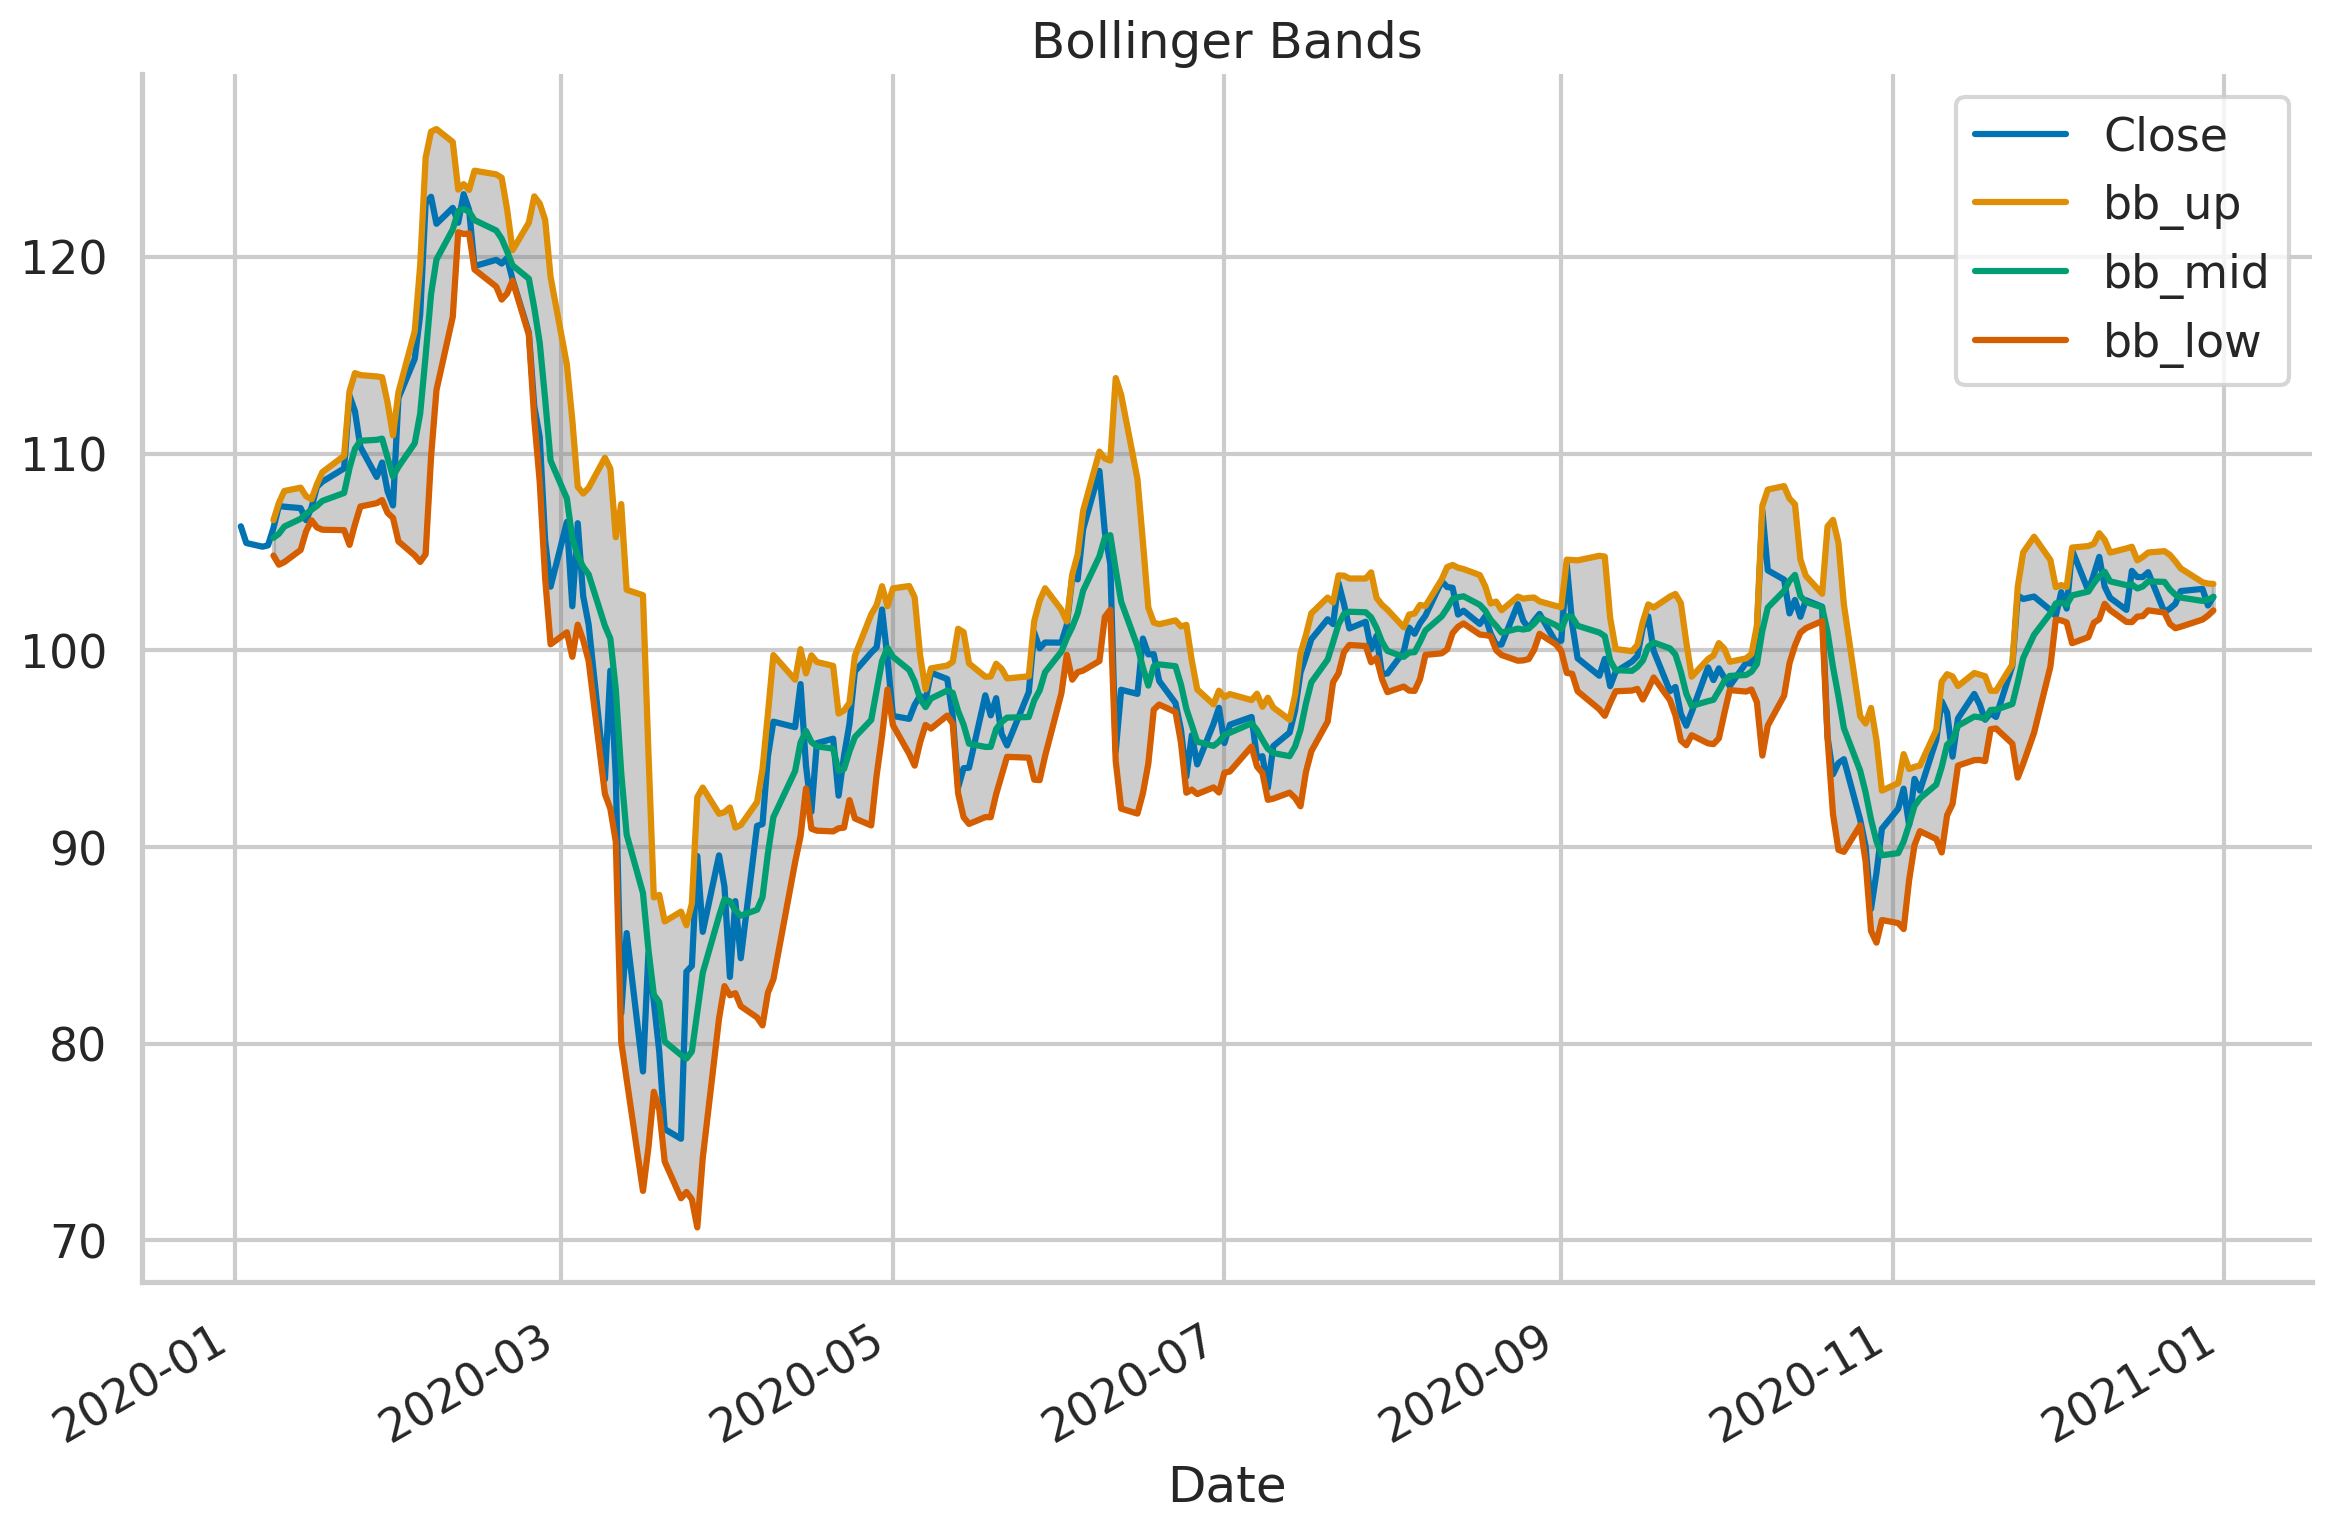

In [7]:
df["bb_up"], df["bb_mid"], df["bb_low"] = talib.BBANDS(df["Close"])

fig, ax = plt.subplots()

(
    df.loc[:, ["Close", "bb_up", "bb_mid", "bb_low"]]
    .plot(ax=ax, title="Bollinger Bands")
)

ax.fill_between(df.index, df["bb_low"], df["bb_up"],
                color="gray",
                alpha=.4)

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_5_2", dpi=200)

5. Calculate and plot the RSI:

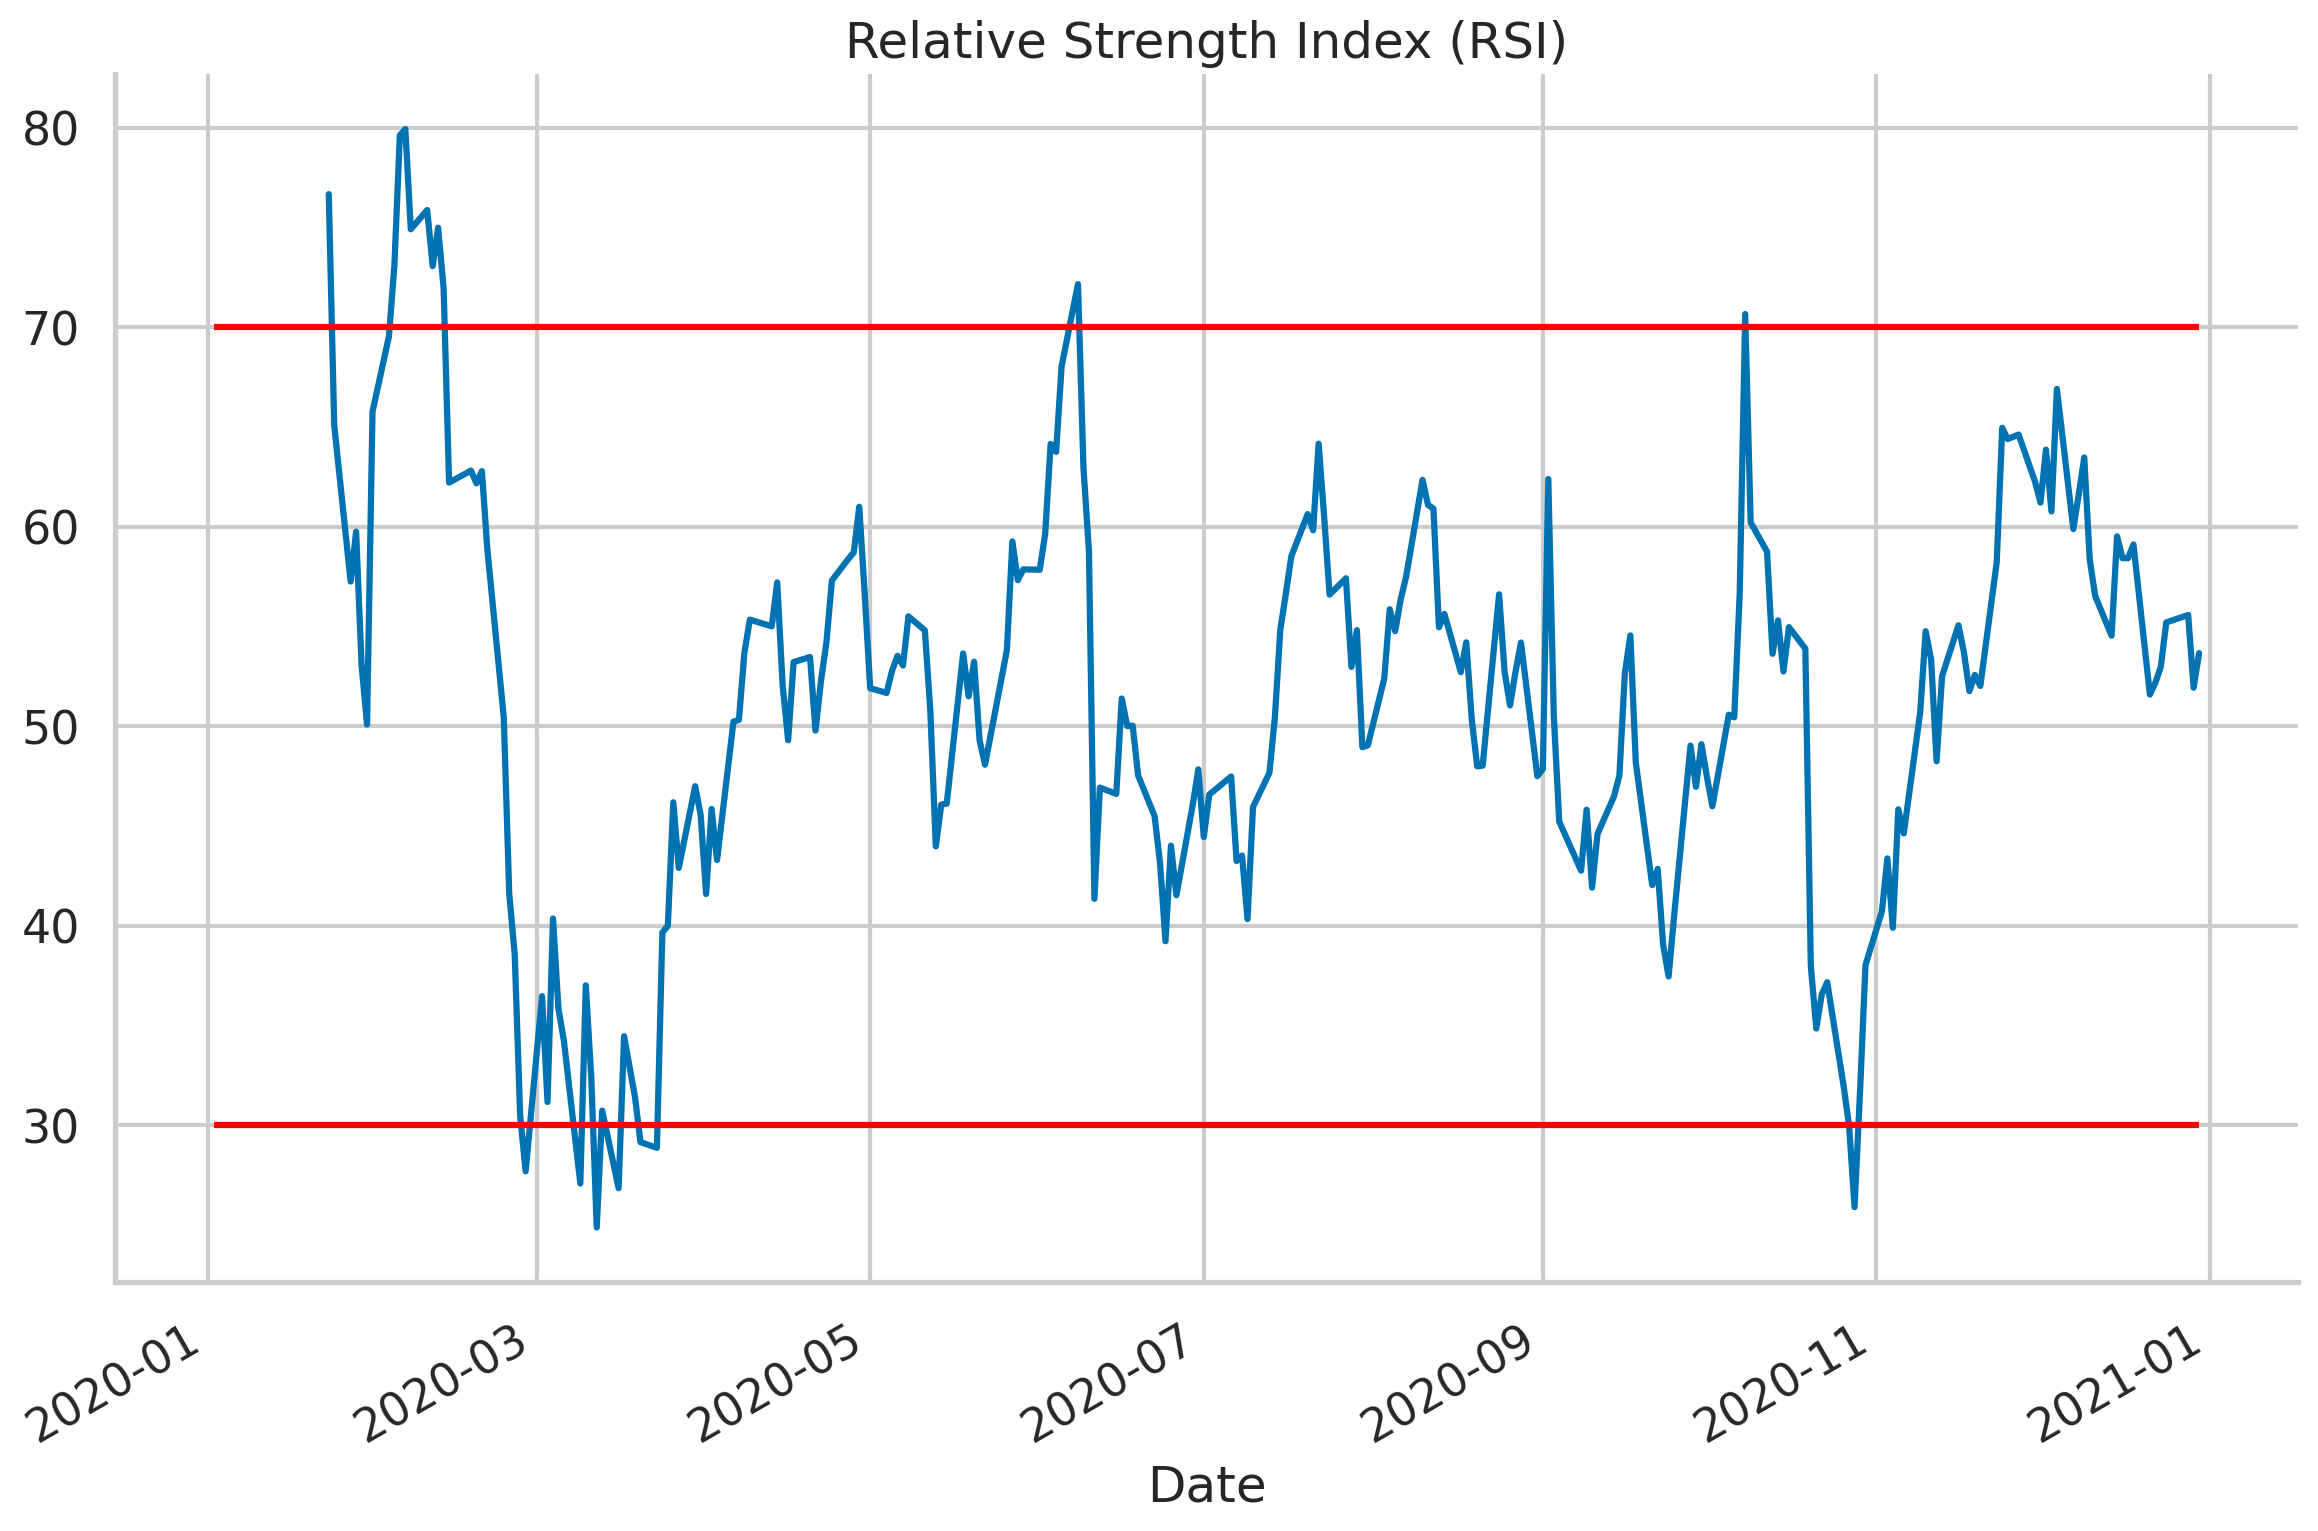

In [8]:
df["rsi"] = talib.RSI(df["Close"])

fig, ax = plt.subplots()
df["rsi"].plot(ax=ax,
               title="Relative Strength Index (RSI)")
ax.hlines(y=30,
          xmin=df.index.min(),
          xmax=df.index.max(),
          color="red")
ax.hlines(y=70,
          xmin=df.index.min(),
          xmax=df.index.max(),
          color="red")

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_5_3", dpi=200)

6. Calculate and plot the MACD:

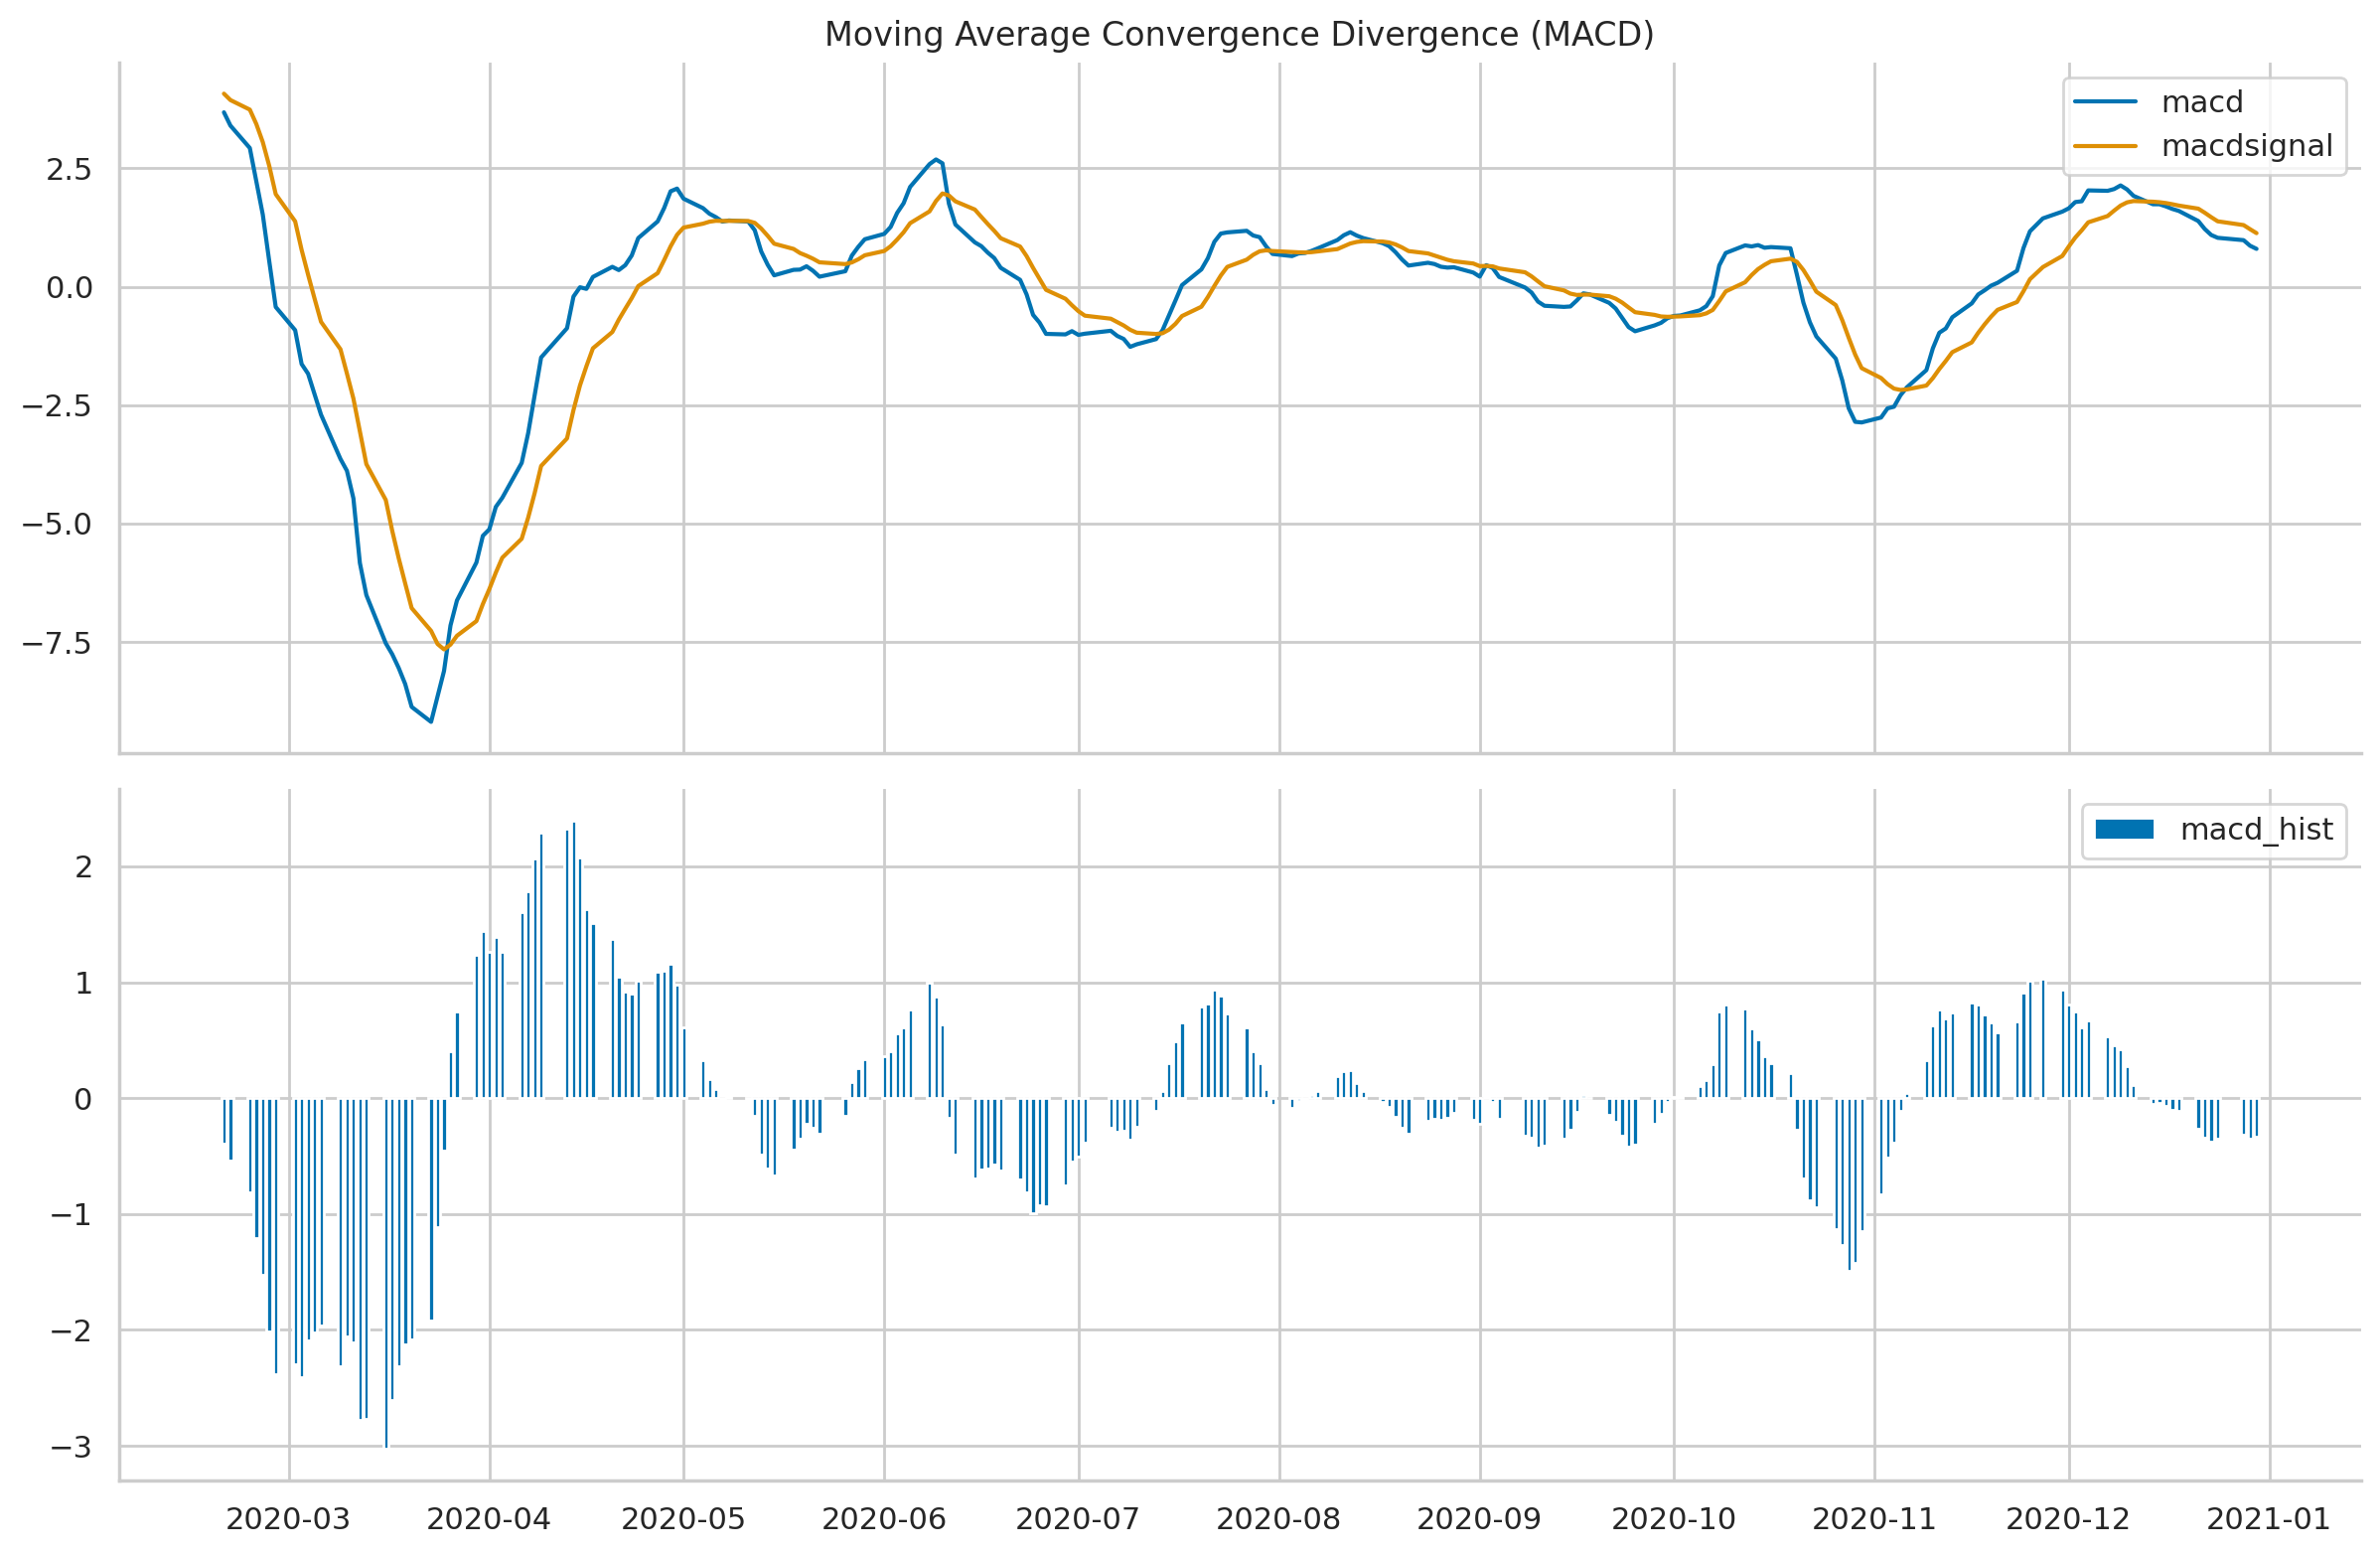

In [9]:
df["macd"], df["macdsignal"], df["macdhist"] = talib.MACD(
    df["Close"], fastperiod=12, slowperiod=26, signalperiod=9
)

with sns.plotting_context("notebook"):
    fig, ax = plt.subplots(2, 1, sharex=True)

    (
        df[["macd", "macdsignal"]].
        plot(ax=ax[0],
             title="Moving Average Convergence Divergence (MACD)")
    )
    ax[1].bar(df.index, df["macdhist"].values, label="macd_hist")
    ax[1].legend()

    sns.despine()
    plt.tight_layout()
    # plt.savefig("images/figure_5_4", dpi=200)


### There's more

1. Import the libraries:

In [10]:
!pip install ta #First Install the package
from ta import add_all_ta_features

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=6e6cbdaeded49fb11ffc3a764e7ac85c76aaec23fa4b6b1a055d665376ca75c1
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


2. Discard the previously calculated indicators and keep only the required columns:

In [12]:
df = df[["Open", "High", "Low", "Close", "Volume"]].copy()

3. Calculate all the technical indicators available in the `ta` library:

In [13]:
df = add_all_ta_features(df, open="Open", high="High",
                         low="Low", close="Close",
                         volume="Volume")

In [14]:
df.shape

(252, 91)

In [15]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'volume_adi', 'volume_obv',
       'volume_cmf', 'volume_fi', 'volume_em', 'volume_sma_em', 'volume_vpt',
       'volume_vwap', 'volume_mfi', 'volume_nvi', 'volatility_bbm',
       'volatility_bbh', 'volatility_bbl', 'volatility_bbw', 'volatility_bbp',
       'volatility_bbhi', 'volatility_bbli', 'volatility_kcc',
       'volatility_kch', 'volatility_kcl', 'volatility_kcw', 'volatility_kcp',
       'volatility_kchi', 'volatility_kcli', 'volatility_dcl',
       'volatility_dch', 'volatility_dcm', 'volatility_dcw', 'volatility_dcp',
       'volatility_atr', 'volatility_ui', 'trend_macd', 'trend_macd_signal',
       'trend_macd_diff', 'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast',
       'trend_ema_slow', 'trend_vortex_ind_pos', 'trend_vortex_ind_neg',
       'trend_vortex_ind_diff', 'trend_trix', 'trend_mass_index', 'trend_dpo',
       'trend_kst', 'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv',
       'trend_ichimoku_base

## 5.2 Downloading the technical indicators

### How to do it...

1. Import the libraries:

In [16]:
!pip install alpha_vantage
from alpha_vantage.techindicators import TechIndicators

2. Instantiate the `TechIndicators` class and authenticate:

In [17]:
ta_api = TechIndicators(key="SXS8LU6AY6E8IU5M",
                        output_format="pandas")

3. Download the RSI for IBM's stock:

In [18]:
rsi_df, rsi_meta = ta_api.get_rsi(symbol="IBM",
                                  time_period=14)

4. Plot the downloaded RSI:

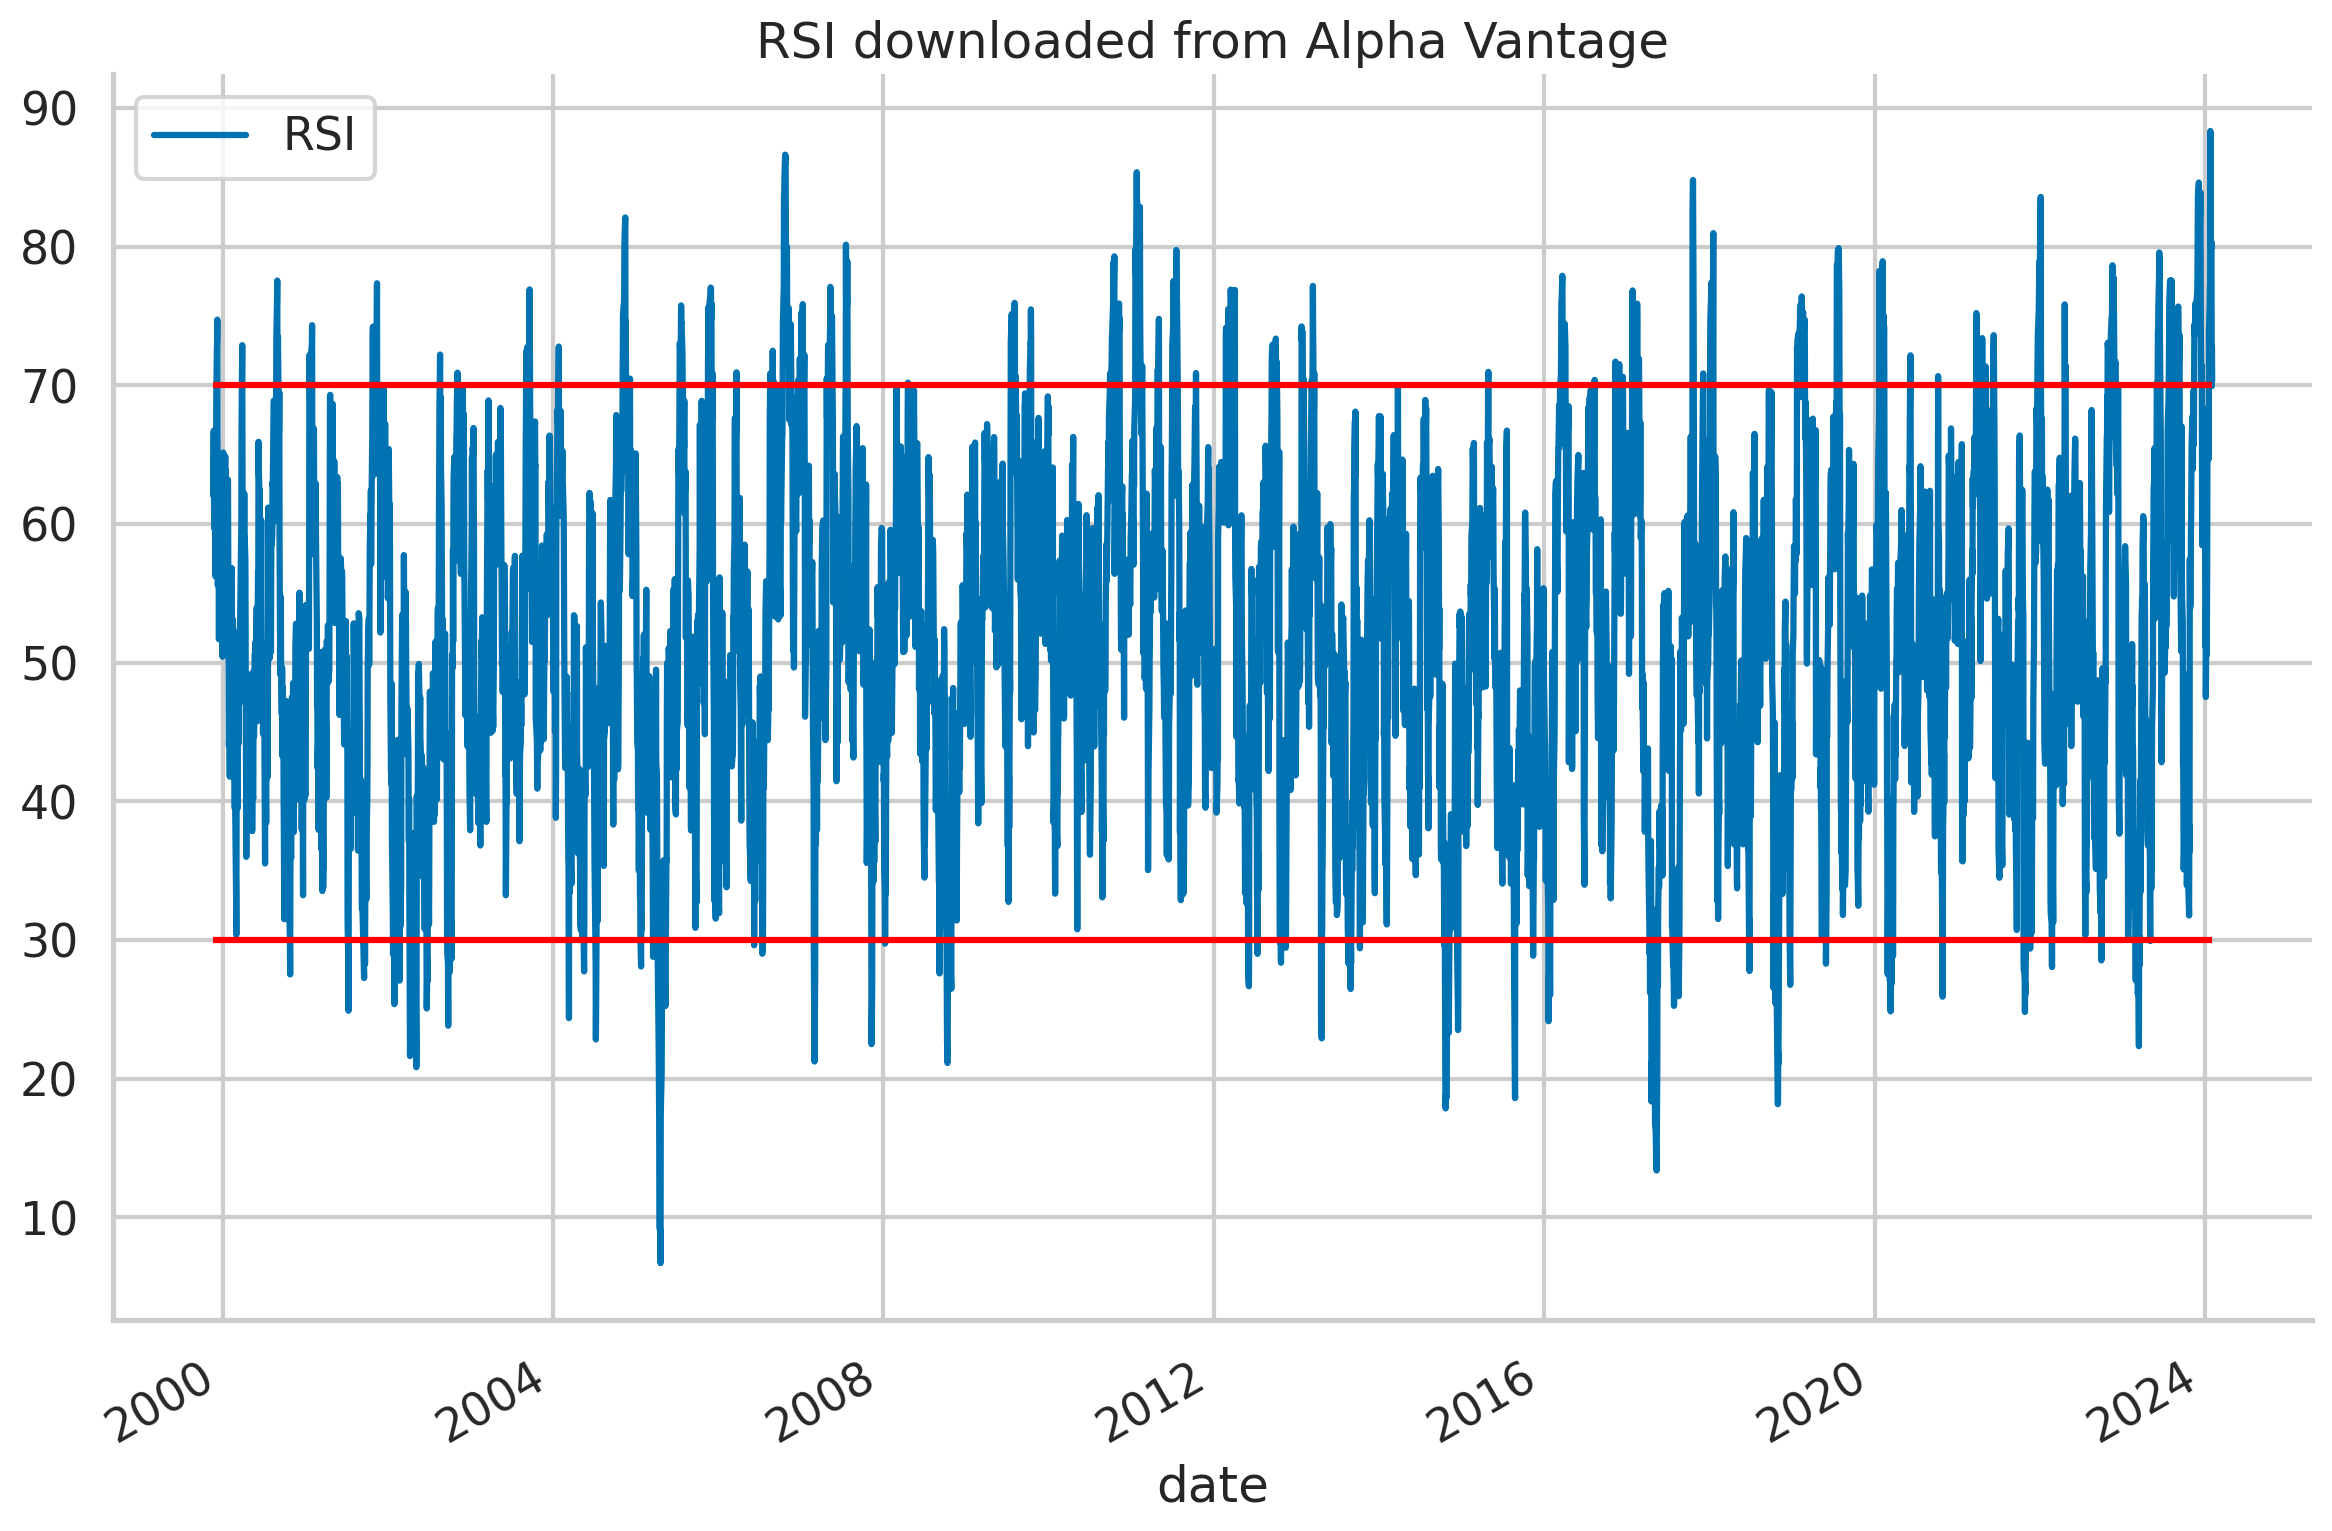

In [19]:
fig, ax = plt.subplots()
rsi_df.plot(ax=ax,
            title="RSI downloaded from Alpha Vantage")
ax.hlines(y=30,
          xmin=rsi_df.index.min(),
          xmax=rsi_df.index.max(),
          color="red")
ax.hlines(y=70,
          xmin=rsi_df.index.min(),
          xmax=rsi_df.index.max(),
          color="red")

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_5_5", dpi=200)

In [20]:
rsi_df

,RSI
date,
1999-11-19,62.0696
1999-11-22,66.7188
1999-11-23,62.8952
1999-11-24,59.7185
1999-11-26,60.4087
...,...
2024-01-29,79.8508
2024-01-30,80.3336
2024-01-31,69.9273


5. Explore the metadata object:

In [21]:
rsi_meta

{'1: Symbol': 'IBM',
 '2: Indicator': 'Relative Strength Index (RSI)',
 '3: Last Refreshed': '2024-02-02',
 '4: Interval': 'daily',
 '5: Time Period': 14,
 '6: Series Type': 'close',
 '7: Time Zone': 'US/Eastern Time'}

## 5.3 Recognizing candlestick patterns

### How to do it...

1. Import the libraries:

In [23]:
!pip install mplfinance

import pandas as pd
import yfinance as yf
import talib
import mplfinance as mpf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.5 MB/s eta 0:00:00


2. Download Bitcoin's hourly prices from the last 3 months:

In [24]:
df = yf.download("BTC-USD",
                 period="9mo",
                 interval="1h",
                 progress=False)
df

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-05-05 11:00:00+00:00,29120.046875,29203.849609,29094.822266,29164.156250,29164.156250,0
2023-05-05 12:00:00+00:00,29162.089844,29219.576172,28887.707031,28971.210938,28971.210938,549398528
2023-05-05 13:00:00+00:00,28962.449219,29247.855469,28919.300781,29175.546875,29175.546875,0
2023-05-05 14:00:00+00:00,29195.435547,29445.701172,29142.640625,29270.791016,29270.791016,301802496
2023-05-05 15:00:00+00:00,29290.490234,29367.158203,29196.988281,29367.158203,29367.158203,158171136
...,...,...,...,...,...,...
2024-02-05 07:00:00+00:00,42780.132812,43120.621094,42762.800781,43013.558594,43013.558594,410952704
2024-02-05 08:00:00+00:00,43034.355469,43152.273438,42962.800781,43000.945312,43000.945312,277578752
2024-02-05 09:00:00+00:00,42992.378906,43014.511719,42918.441406,42999.312500,42999.312500,30811136


3. Identify the "Three Line Strike" pattern:

In [25]:
df["3_line_strike"] = talib.CDL3LINESTRIKE(
    df["Open"], df["High"], df["Low"], df["Close"]
)

4. Locate and plot the bearish pattern:

In [26]:
df[df["3_line_strike"] == -100].head().round(2)

,Open,High,Low,Close,Adj Close,Volume,3_line_strike
Datetime,,,,,,,
2023-05-18 07:00:00+00:00,27218.53,27443.23,27205.69,27393.38,27393.38,0,-100
2023-05-21 19:00:00+00:00,26882.85,26923.39,26873.72,26909.70,26909.70,0,-100
2023-05-22 13:00:00+00:00,26743.36,27045.73,26714.18,27016.17,27016.17,670828544,-100
2023-05-23 01:00:00+00:00,26821.62,27083.51,26816.18,26998.26,26998.26,571061248,-100
2023-06-04 06:00:00+00:00,27042.96,27142.12,27041.88,27133.54,27133.54,105805824,-100


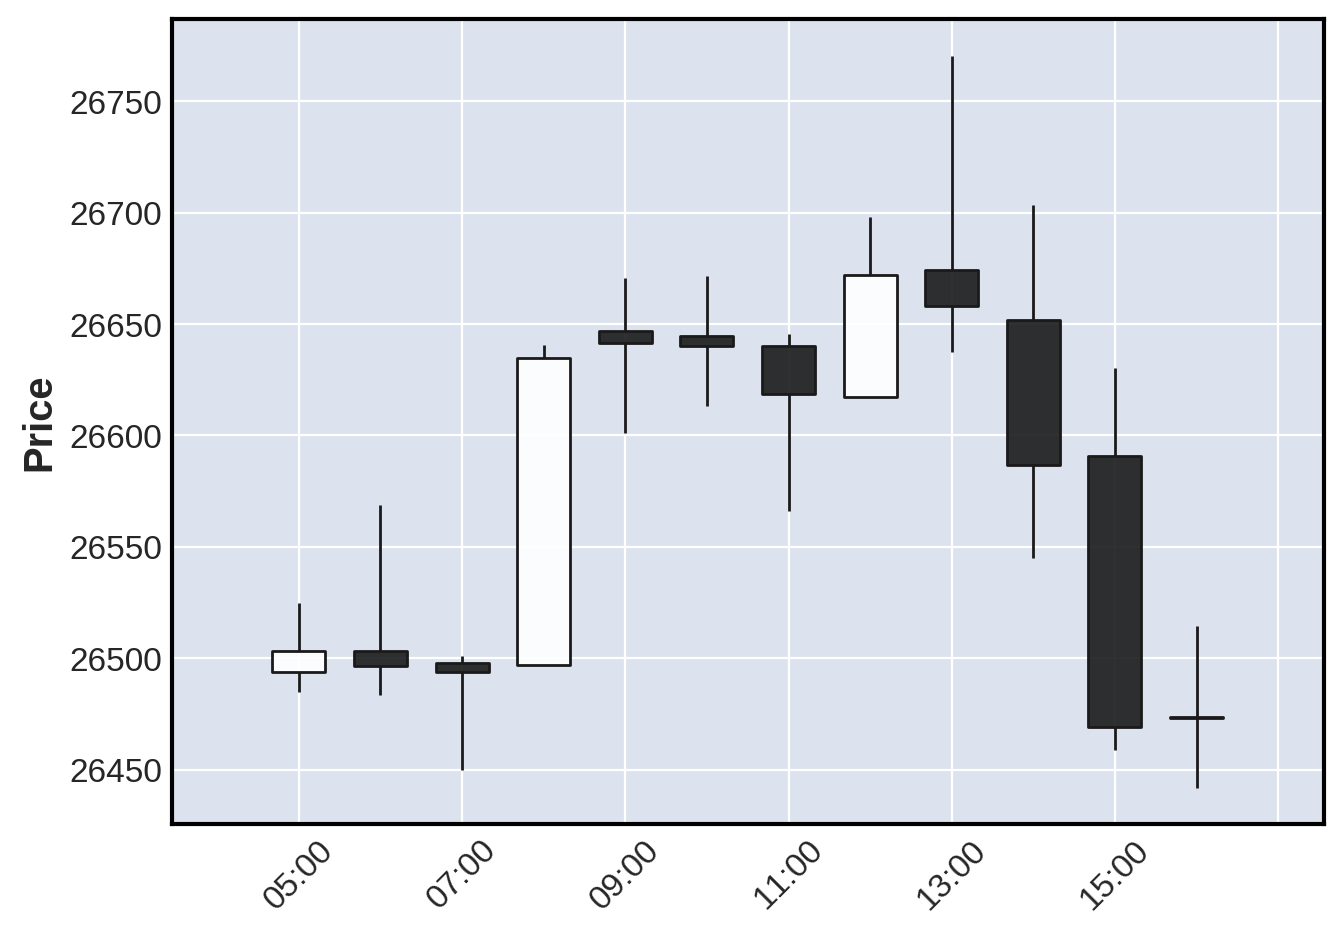

In [27]:
mpf.plot(df["2023-06-09 05:00:00":"2023-06-09 16:00:00"],
         type="candle")

5. Locate and plot the bullish pattern:

In [28]:
df[df["3_line_strike"] == 100].head().round(2)

,Open,High,Low,Close,Adj Close,Volume,3_line_strike
Datetime,,,,,,,
2023-06-12 12:00:00+00:00,25991.80,25991.80,25912.51,25930.69,25930.69,41630720,100
2023-07-08 18:00:00+00:00,30264.95,30264.95,30202.94,30205.38,30205.38,0,100
2023-07-16 23:00:00+00:00,30338.71,30338.71,30171.79,30250.34,30250.34,264502784,100
2023-08-10 11:00:00+00:00,29519.91,29523.74,29462.47,29470.03,29470.03,0,100
2023-08-30 06:00:00+00:00,27464.55,27464.55,27379.30,27386.76,27386.76,99358720,100


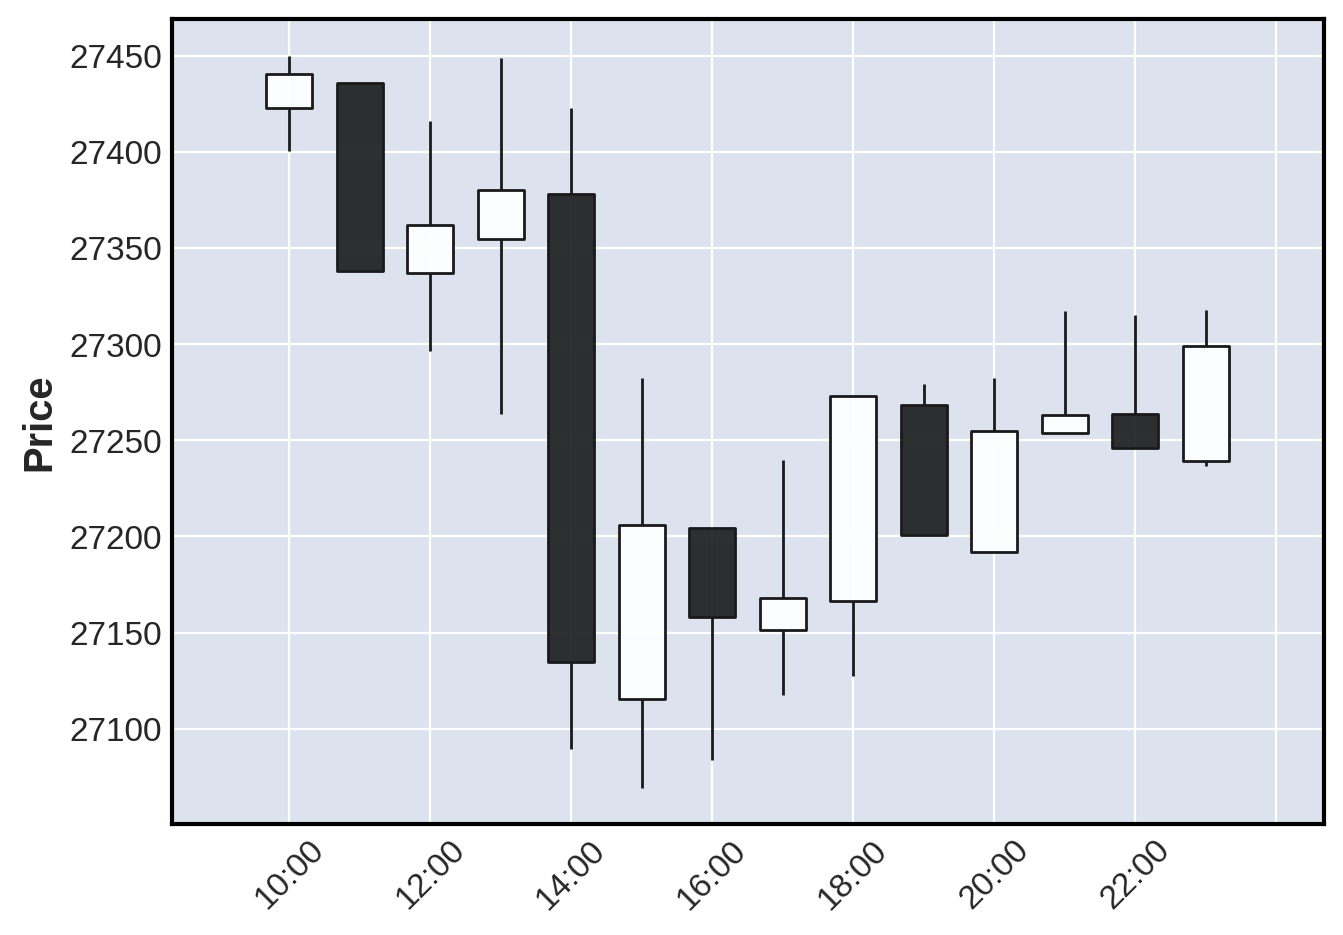

In [29]:
mpf.plot(df["2023-08-30 10:00:00":"2023-08-30 23:00:00"],
         type="candle")

### There's more

1. Get all available pattern names:

In [30]:
candle_names = talib.get_function_groups()["Pattern Recognition"]

2. Iterate over the list of patterns and try identifying them all:

In [31]:
for candle in candle_names:
    df[candle] = getattr(talib, candle)(df["Open"], df["High"],
                                        df["Low"], df["Close"])

3. Inspect the summary statistics of the patterns:

In [32]:
with pd.option_context("display.max_rows", len(candle_names)):
    display(df[candle_names].describe().transpose().round(2))

,count,mean,std,min,25%,50%,75%,max
CDL2CROWS,6595.0,-0.03,1.74,-100.0,0.0,0.0,0.0,0.0
CDL3BLACKCROWS,6595.0,-0.05,2.13,-100.0,0.0,0.0,0.0,0.0
CDL3INSIDE,6595.0,-0.05,11.35,-100.0,0.0,0.0,0.0,100.0
CDL3LINESTRIKE,6595.0,-0.08,6.86,-100.0,0.0,0.0,0.0,100.0
CDL3OUTSIDE,6595.0,-0.33,23.94,-100.0,0.0,0.0,0.0,100.0
CDL3STARSINSOUTH,6595.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
CDL3WHITESOLDIERS,6595.0,0.18,4.26,0.0,0.0,0.0,0.0,100.0
CDLABANDONEDBABY,6595.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
CDLADVANCEBLOCK,6595.0,-0.96,9.73,-100.0,0.0,0.0,0.0,0.0
CDLBELTHOLD,6595.0,0.30,43.15,-100.0,0.0,0.0,0.0,100.0


4. Locate and plot the "Evening Star" pattern:

In [33]:
df[df["CDLEVENINGSTAR"]  == -100].head()

,Open,High,Low,Close,Adj Close,Volume,3_line_strike,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,...,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-05-10 21:00:00+00:00,27875.826172,27875.826172,27440.468750,27521.869141,27521.869141,652687360,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100
2023-05-16 19:00:00+00:00,27052.705078,27052.705078,26910.197266,26946.886719,26946.886719,16851968,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-06-01 00:00:00+00:00,27218.412109,27346.105469,27048.951172,27062.232422,27062.232422,577002496,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-07-03 04:00:00+00:00,30759.115234,30789.113281,30683.988281,30683.988281,30683.988281,152043520,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-07-08 18:00:00+00:00,30264.947266,30264.947266,30202.941406,30205.380859,30205.380859,0,100,0,0,0,...,0,0,0,0,0,0,0,0,0,0


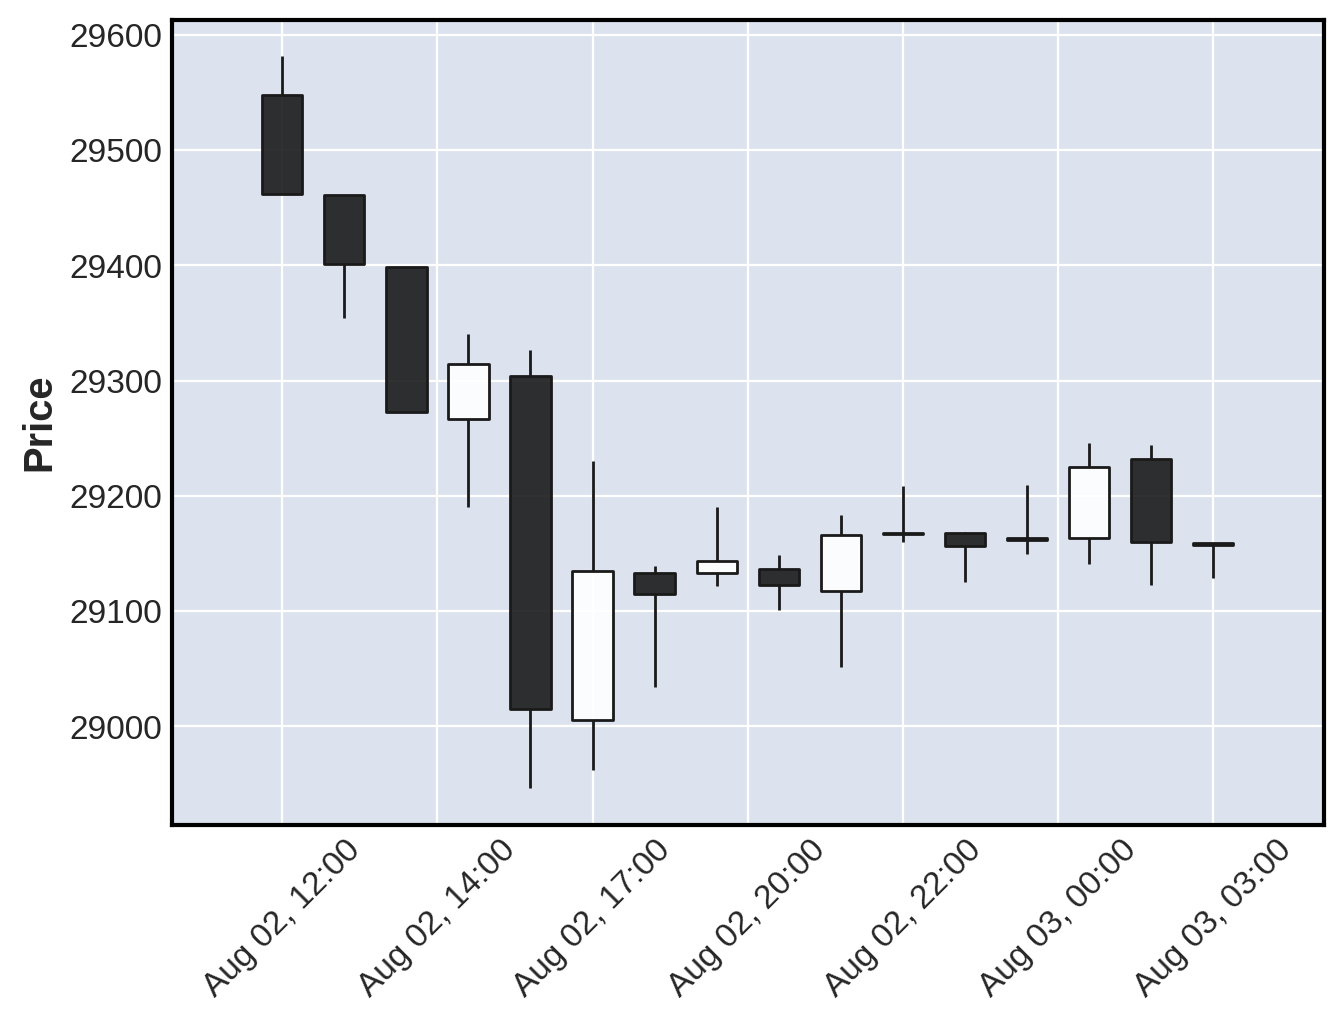

In [34]:
mpf.plot(df["2023-08-02 12:00:00":"2023-08-03 03:00:00"], type="candle")